<a href="https://colab.research.google.com/github/DayenaJeong/FS_neuron/blob/main/FS_conversion_uniform_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def swish(x):
    return x * 1 / (1 + np.exp(-x))


def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))


def softplus(x, beta=1):
    return (1 / beta) * np.log(1 + np.exp(beta * x))


def mish(x, beta=1):
    return x * np.tanh(softplus(x, beta))

In [3]:
# Implementation of spike function for PyTorch custom gradient
class SpikeFunction(autograd.Function):
    @staticmethod
    def forward(ctx, v_scaled):
        z_ = torch.where(v_scaled > 0, torch.ones_like(v_scaled), torch.zeros_like(v_scaled))
        ctx.save_for_backward(v_scaled)
        return z_

    @staticmethod
    def backward(ctx, grad_output):
        v_scaled, = ctx.saved_tensors
        dz_dv_scaled = torch.maximum(1 - torch.abs(v_scaled), torch.tensor(0.0, device=v_scaled.device))
        dE_dv_scaled = grad_output * dz_dv_scaled
        return dE_dv_scaled

# Call spike function for PyTorch
def spike_function(v_scaled):
    return SpikeFunction.apply(v_scaled)

# FS class definition
class FS(nn.Module):
    def __init__(self, num_params):
        super(FS, self).__init__()

        super(FS, self).__init__()
        self.num_params = num_params
        self.indices = torch.arange(1, num_params + 1).float()

        if num_params == 4:
            h = torch.tensor([0.9813, -1.9998, -0.6859, 0.0726])
            d = torch.tensor([0.4719, 0.8930, -0.2312, -0.1692])
            T = torch.tensor([-1.2178, -0.0103, 0.9895, 0.9898])
        elif num_params == 8:
            h = torch.tensor([6.8620, 3.8446, 3.4882, 1.5610, 1.1893, 1.4751, -2.6189, 0.1495])
            d = torch.tensor([0.0891, 0.6711, 0.0253, 0.1613, -0.0060, -0.0086, 0.9554, -0.7933])
            T = torch.tensor([9.2329, 0.0567, 2.0161, -1.2216, 0.5962, -0.3178, -2.6367, -1.0322])
        elif num_params == 12:
            h = torch.tensor([1.9139, 1.2510, 2.0618, 0.7526, 1.5032, 0.3668, 1.9875, 1.1889, 0.5554, 0.4489, 1.1767, 0.1623])
            d = torch.tensor([0.4217, 0.2337, 0.1932, 0.0021, 0.0887, 0.0465, 0.0138, 1.2080, -0.0026, 0.1974, 0.0001, 0.0001])
            T = torch.tensor([0.0443, -0.9573, -1.5970, 2.4553, -2.7807, -3.4746, -2.0787, 1.7883, 0.7193, 3.4051, 0.2201, -0.0492])
        elif num_params == 16:
            h = torch.tensor([2.5733, 1.3121, 0.8950, 1.0941, 1.5366, 0.5694, 1.4563, 0.9944, 1.0961, -1.9481, 1.2481, 0.3490, 0.4921, 0.7793, 2.7194, 1.0211])
            d = torch.tensor([0.5183, 0.2210, 0.0476, 0.0298, 0.0310, 0.0015, 0.0008, 0.0011, 0.0026, 0.3293, -0.2537, 1.2654, 0.8791, 0.0033, 0.0023, 0.0710])
            T = torch.tensor([0.1467, -1.1673, -2.9088, -4.0010, -2.0569, 0.0914, 0.6653, 0.5048, 0.2919, -4.0346, -3.0172, 1.8976, 1.8881, 0.3116, 0.0206, -2.8496])


        self.h = nn.Parameter(h + torch.rand(h.size()) * 0.1)
        self.d = nn.Parameter(d + torch.rand(d.size()) * 0.1)
        self.T = nn.Parameter(T + torch.rand(T.size()) * 0.1)

    def forward(self, x):
        v = x.clone()

        # Initialize temporary output for FS spike neural network
        temp_out = torch.zeros_like(v)

        # Implement FS spike neural network
        for t in range(len(self.T)):
            #v_scaled = (v - self.T[t]) / (torch.abs(v) + 1)
            v_scaled = v - self.T[t]
            z = spike_function(v_scaled)
            temp_out += z * self.d[t]
            v = v - z * self.h[t]

        return temp_out

# Sigmoid

K=4

Epoch 1/20000, Loss: 0.018164299428462982
Epoch 1001/20000, Loss: 0.005720097105950117
Epoch 2001/20000, Loss: 0.0057196044363081455
Epoch 3001/20000, Loss: 0.005719604901969433
Epoch 4001/20000, Loss: 0.005719606764614582
Epoch 5001/20000, Loss: 0.005719536915421486
Epoch 6001/20000, Loss: 0.005719535984098911
Epoch 7001/20000, Loss: 0.005719535984098911
Epoch 8001/20000, Loss: 0.005719536915421486
Epoch 9001/20000, Loss: 0.005719606298953295
Epoch 10001/20000, Loss: 0.005719396751374006
Epoch 11001/20000, Loss: 0.005719540175050497
Epoch 12001/20000, Loss: 0.005719686392694712
Epoch 13001/20000, Loss: 0.005719535984098911
Epoch 14001/20000, Loss: 0.005719476845115423
Epoch 15001/20000, Loss: 0.005719464272260666
Epoch 16001/20000, Loss: 0.005719682201743126
Epoch 17001/20000, Loss: 0.005719606764614582
Epoch 18001/20000, Loss: 0.005719541106373072
Epoch 19001/20000, Loss: 0.005719824228435755
Loss values: [0.018164299428462982, 0.005761146079748869, 0.005739276297390461, 0.0057273157

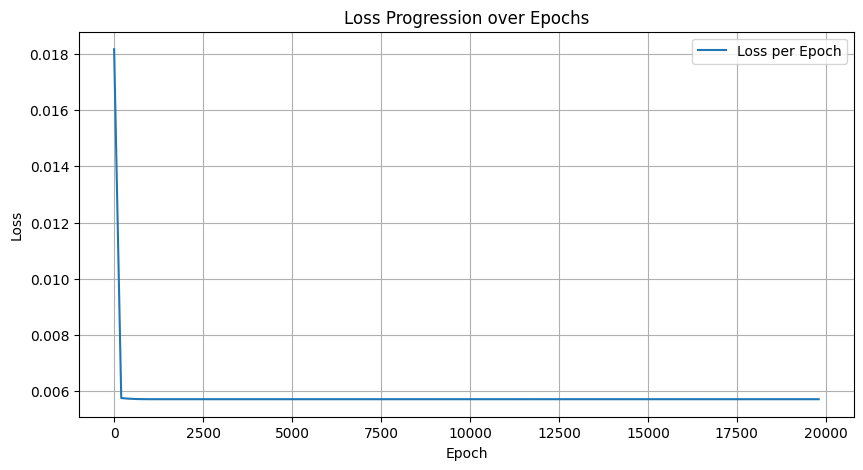

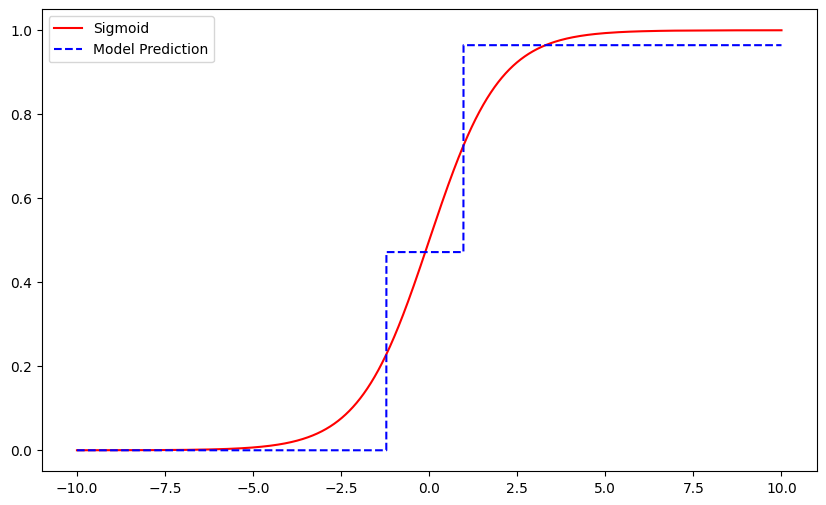

In [4]:
# Instantiate model and initial setup
num_params = 4  # Select arbitrary number of parameters
model = FS(num_params)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data
x_train = torch.linspace(-10, 10, steps=100000).unsqueeze(1)

# x_train = torch.cat((
#     torch.linspace(-8, -5, steps=5000),
#     torch.linspace(-5, 0, steps=60000),
#     torch.linspace(0, 12, steps=35000)
# )).unsqueeze(1)

y_train = sigmoid(x_train)  # Target value

torch.autograd.set_detect_anomaly(True)

# Training loop
loss_values = []

epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(x_train)  # Forward pass, including v_reg and z_reg calculations
    loss = criterion(y_pred, y_train)  # Remove `.squeeze()` call
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
       print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

    if epoch % 200 == 0:
       loss_values.append(loss.item())

# Print final loss
print("Loss values:", loss_values)
print(f'Final Loss: {loss.item()}')
print(f'Final h: {model.h.data}')
print(f'Final d: {model.d.data}')
print(f'Final T: {model.T.data}')

# Plot loss values
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs, 200), loss_values, label='Loss per Epoch')
plt.title('Loss Progression over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate model predictions
with torch.no_grad():  # No gradient computation needed
    y_pred = model(x_train).squeeze()

# True function values
y_true = sigmoid(x_train).squeeze()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_true.numpy(), label='Sigmoid', color='r')
plt.plot(x_train.numpy(), y_pred.numpy(), label='Model Prediction', linestyle='--', color='b')
# plt.xlabel('Input x')
# plt.ylabel('Output y')
plt.legend()

plt.show()

k=8

Epoch 1/20000, Loss: 0.02686064876616001
Epoch 1001/20000, Loss: 0.002143936464563012
Epoch 2001/20000, Loss: 0.001858182717114687
Epoch 3001/20000, Loss: 0.0018326712306588888
Epoch 4001/20000, Loss: 0.0018057160777971148
Epoch 5001/20000, Loss: 0.0019508050754666328
Epoch 6001/20000, Loss: 0.0023907131981104612
Epoch 7001/20000, Loss: 0.0017037233337759972
Epoch 8001/20000, Loss: 0.001511624432168901
Epoch 9001/20000, Loss: 0.0014594487147405744
Epoch 10001/20000, Loss: 0.0014174517709761858
Epoch 11001/20000, Loss: 0.0014224887127056718
Epoch 12001/20000, Loss: 0.0014042132534086704
Epoch 13001/20000, Loss: 0.0013927859254181385
Epoch 14001/20000, Loss: 0.0013922512298449874
Epoch 15001/20000, Loss: 0.0013983758399263024
Epoch 16001/20000, Loss: 0.0013865800574421883
Epoch 17001/20000, Loss: 0.0013781364541500807
Epoch 18001/20000, Loss: 0.0013795065460726619
Epoch 19001/20000, Loss: 0.0013793827965855598
Loss values: [0.02686064876616001, 0.0026405637618154287, 0.002372869756072759

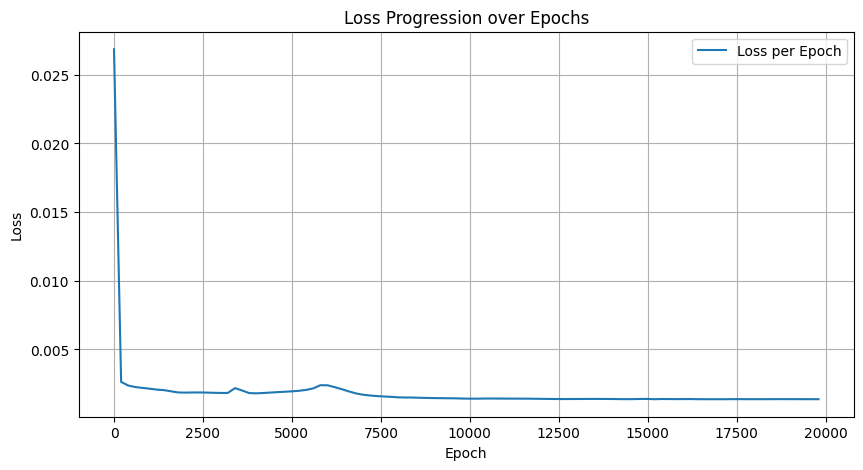

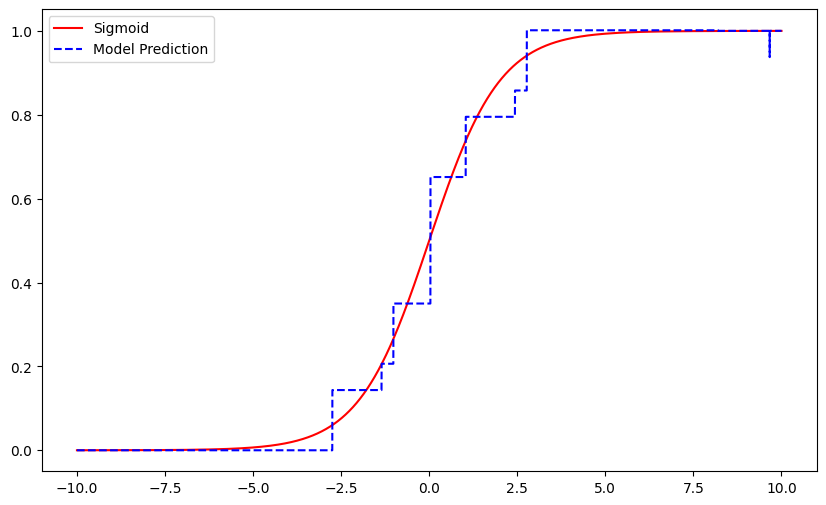

In [5]:
# Instantiate model and initial setup
num_params = 8  # Select arbitrary number of parameters
model = FS(num_params)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data
x_train = torch.linspace(-10, 10, steps=100000).unsqueeze(1)

# x_train = torch.cat((
#     torch.linspace(-8, -5, steps=5000),
#     torch.linspace(-5, 0, steps=60000),
#     torch.linspace(0, 12, steps=35000)
# )).unsqueeze(1)

y_train = sigmoid(x_train)  # Target value

torch.autograd.set_detect_anomaly(True)

# Training loop
loss_values = []

epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(x_train)  # Forward pass, including v_reg and z_reg calculations
    loss = criterion(y_pred, y_train)  # Remove `.squeeze()` call
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
       print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

    if epoch % 200 == 0:
       loss_values.append(loss.item())

# Print final loss
print("Loss values:", loss_values)
print(f'Final Loss: {loss.item()}')
print(f'Final h: {model.h.data}')
print(f'Final d: {model.d.data}')
print(f'Final T: {model.T.data}')

# Plot loss values
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs, 200), loss_values, label='Loss per Epoch')
plt.title('Loss Progression over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate model predictions
with torch.no_grad():  # No gradient computation needed
    y_pred = model(x_train).squeeze()

# True function values
y_true = sigmoid(x_train).squeeze()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_true.numpy(), label='Sigmoid', color='r')
plt.plot(x_train.numpy(), y_pred.numpy(), label='Model Prediction', linestyle='--', color='b')
# plt.xlabel('Input x')
# plt.ylabel('Output y')
plt.legend()

plt.show()

k=12

Epoch 1/20000, Loss: 0.03950550779700279
Epoch 1001/20000, Loss: 0.00016860301548149437
Epoch 2001/20000, Loss: 0.00015613416326232255
Epoch 3001/20000, Loss: 0.00016109811258502305
Epoch 4001/20000, Loss: 0.0001708020718069747
Epoch 5001/20000, Loss: 0.00015472676022909582
Epoch 6001/20000, Loss: 0.00014723585627507418
Epoch 7001/20000, Loss: 0.0001384153583785519
Epoch 8001/20000, Loss: 0.00011841922969324514
Epoch 9001/20000, Loss: 0.00012040687579428777
Epoch 10001/20000, Loss: 0.00011894760245922953
Epoch 11001/20000, Loss: 0.00010104647662956268
Epoch 12001/20000, Loss: 9.476936247665435e-05
Epoch 13001/20000, Loss: 9.455789404455572e-05
Epoch 14001/20000, Loss: 9.458370186621323e-05
Epoch 15001/20000, Loss: 9.455273539060727e-05
Epoch 16001/20000, Loss: 9.458846761845052e-05
Epoch 17001/20000, Loss: 9.45892243180424e-05
Epoch 18001/20000, Loss: 9.479181608185172e-05
Epoch 19001/20000, Loss: 5.890903412364423e-05
Loss values: [0.03950550779700279, 0.00044124474516138434, 0.000247

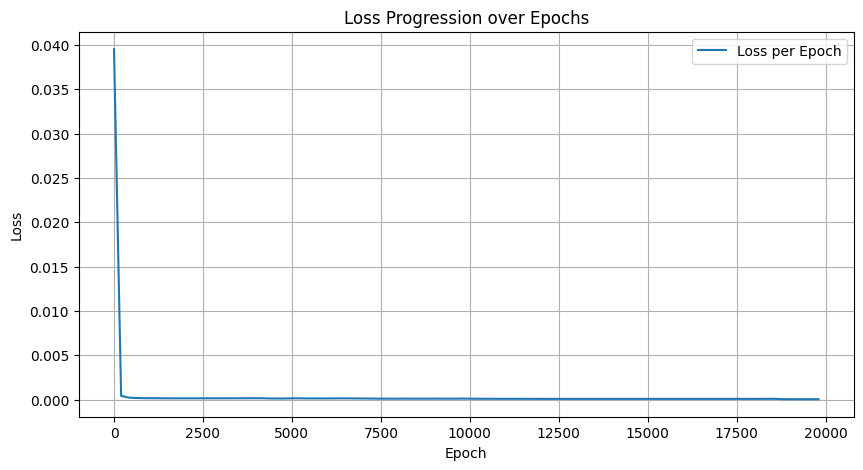

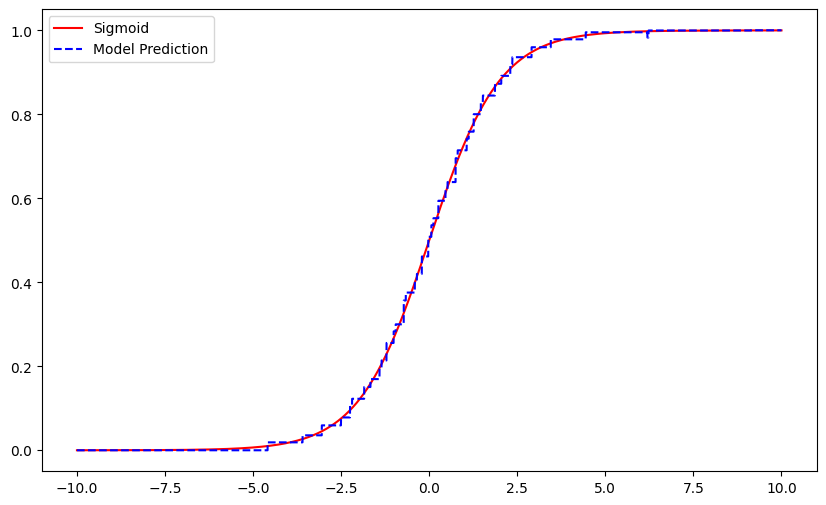

In [6]:
# Instantiate model and initial setup
num_params = 12  # Select arbitrary number of parameters
model = FS(num_params)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data
x_train = torch.linspace(-10, 10, steps=100000).unsqueeze(1)

# x_train = torch.cat((
#     torch.linspace(-8, -5, steps=5000),
#     torch.linspace(-5, 0, steps=60000),
#     torch.linspace(0, 12, steps=35000)
# )).unsqueeze(1)

y_train = sigmoid(x_train)  # Target value

torch.autograd.set_detect_anomaly(True)

# Training loop
loss_values = []

epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(x_train)  # Forward pass, including v_reg and z_reg calculations
    loss = criterion(y_pred, y_train)  # Remove `.squeeze()` call
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
       print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

    if epoch % 200 == 0:
       loss_values.append(loss.item())

# Print final loss
print("Loss values:", loss_values)
print(f'Final Loss: {loss.item()}')
print(f'Final h: {model.h.data}')
print(f'Final d: {model.d.data}')
print(f'Final T: {model.T.data}')

# Plot loss values
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs, 200), loss_values, label='Loss per Epoch')
plt.title('Loss Progression over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate model predictions
with torch.no_grad():  # No gradient computation needed
    y_pred = model(x_train).squeeze()

# True function values
y_true = sigmoid(x_train).squeeze()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_true.numpy(), label='Sigmoid', color='r')
plt.plot(x_train.numpy(), y_pred.numpy(), label='Model Prediction', linestyle='--', color='b')
# plt.xlabel('Input x')
# plt.ylabel('Output y')
plt.legend()

plt.show()

K=16

Epoch 1/20000, Loss: 0.0858355388045311
Epoch 1001/20000, Loss: 0.0004892724100500345
Epoch 2001/20000, Loss: 0.0003606773680076003
Epoch 3001/20000, Loss: 0.00031189285800792277
Epoch 4001/20000, Loss: 0.0003114600258413702
Epoch 5001/20000, Loss: 0.00031957903411239386
Epoch 6001/20000, Loss: 0.00033419151441194117
Epoch 7001/20000, Loss: 0.00037149779382161796
Epoch 8001/20000, Loss: 0.00042522369767539203
Epoch 9001/20000, Loss: 0.0004836399748455733
Epoch 10001/20000, Loss: 0.0005248170346021652
Epoch 11001/20000, Loss: 0.000542746449355036
Epoch 12001/20000, Loss: 0.000544442911632359
Epoch 13001/20000, Loss: 0.0005451923352666199
Epoch 14001/20000, Loss: 0.0005320937489159405
Epoch 15001/20000, Loss: 0.0005332133732736111
Epoch 16001/20000, Loss: 0.0005198150756768882
Epoch 17001/20000, Loss: 0.0005107760080136359
Epoch 18001/20000, Loss: 0.0004990093875676394
Epoch 19001/20000, Loss: 0.0004892955184914172
Loss values: [0.0858355388045311, 0.0011792014120146632, 0.00065533071756

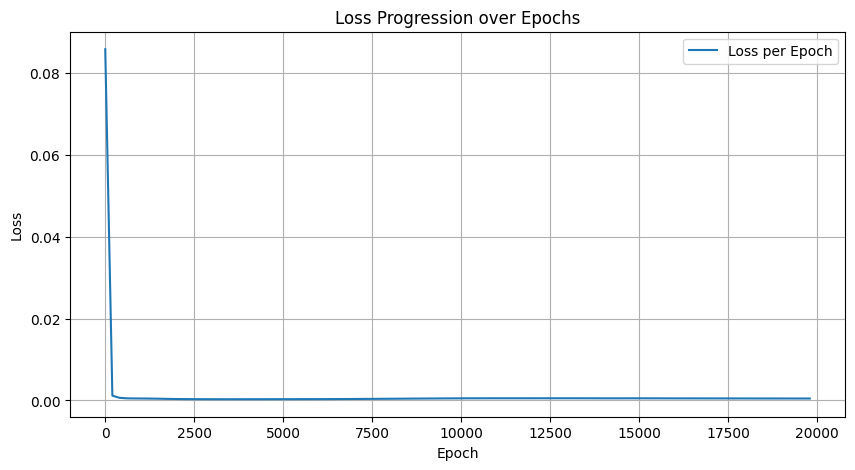

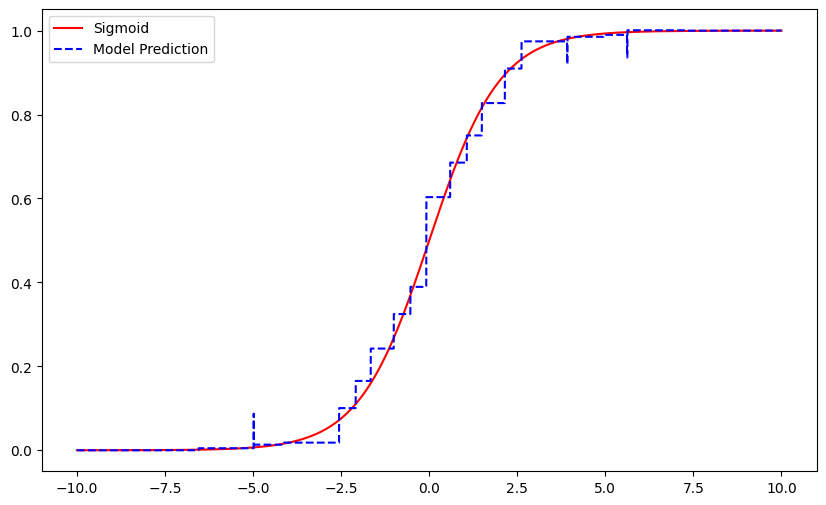

In [7]:
# Instantiate model and initial setup
num_params = 16  # Select arbitrary number of parameters
model = FS(num_params)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data
x_train = torch.linspace(-10, 10, steps=100000).unsqueeze(1)

# x_train = torch.cat((
#     torch.linspace(-8, -5, steps=5000),
#     torch.linspace(-5, 0, steps=60000),
#     torch.linspace(0, 12, steps=35000)
# )).unsqueeze(1)

y_train = sigmoid(x_train)  # Target value

torch.autograd.set_detect_anomaly(True)

# Training loop
loss_values = []

epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(x_train)  # Forward pass, including v_reg and z_reg calculations
    loss = criterion(y_pred, y_train)  # Remove `.squeeze()` call
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
       print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

    if epoch % 200 == 0:
       loss_values.append(loss.item())

# Print final loss
print("Loss values:", loss_values)
print(f'Final Loss: {loss.item()}')
print(f'Final h: {model.h.data}')
print(f'Final d: {model.d.data}')
print(f'Final T: {model.T.data}')

# Plot loss values
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs, 200), loss_values, label='Loss per Epoch')
plt.title('Loss Progression over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate model predictions
with torch.no_grad():  # No gradient computation needed
    y_pred = model(x_train).squeeze()

# True function values
y_true = sigmoid(x_train).squeeze()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_true.numpy(), label='Sigmoid', color='r')
plt.plot(x_train.numpy(), y_pred.numpy(), label='Model Prediction', linestyle='--', color='b')
# plt.xlabel('Input x')
# plt.ylabel('Output y')
plt.legend()

plt.show()